In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings 


In [2]:
path=r'C:\Users\banda\Chocolate'

In [12]:
df=pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'data.csv'))

In [14]:
df.head()


,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [15]:
df.dtypes

Company \n(Maker-if known)            object
Specific Bean Origin\nor Bar Name     object
REF                                    int64
Review\nDate                           int64
Cocoa\nPercent                        object
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object

In [25]:
df.isnull().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
Review Date                          0
dtype: int64

In [17]:
 # Convert to datetime format
df['Review Date'] = pd.to_datetime(df['Review\nDate'], format='%Y') 


In [26]:
# Group by 'Company Location' and 'Review Date', calculate mean rating
grouped_data = df.groupby(['Company\nLocation', 'Review Date'])['Rating'].mean().reset_index()

In [27]:
# Find the top 10 countries based on average rating
top_countries = grouped_data.groupby('Company\nLocation')['Rating'].mean().nlargest(10).index

In [28]:
# Filter data for the top 5 countries
top_countries_data = grouped_data[grouped_data['Company\nLocation'].isin(top_countries)]

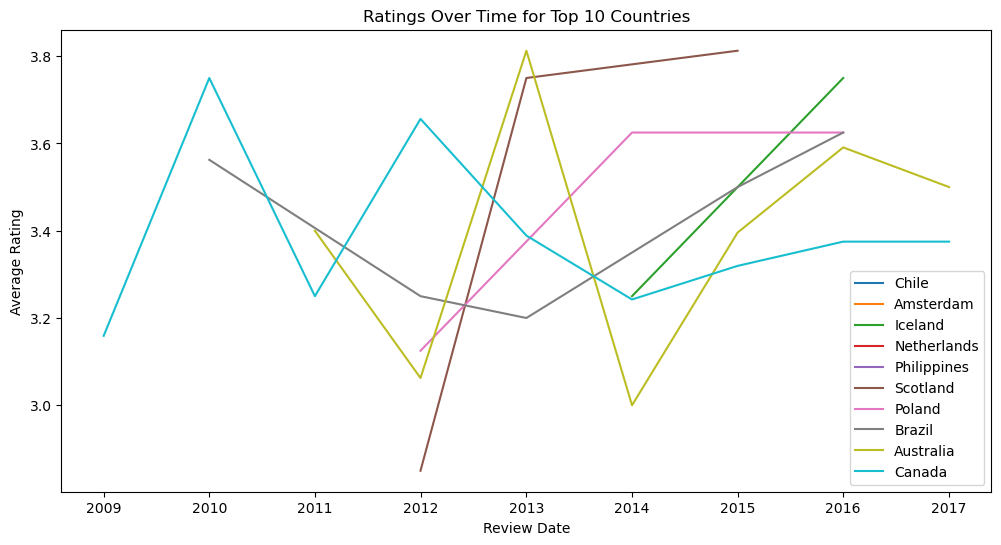

In [29]:
# Plot ratings over time for the top 10 countries
plt.figure(figsize=(12, 6))
for country in top_countries:
    country_data = top_countries_data[top_countries_data['Company\nLocation'] == country]
    plt.plot(country_data['Review Date'], country_data['Rating'], label=country)

plt.title('Ratings Over Time for Top 10 Countries')
plt.xlabel('Review Date')
plt.ylabel('Average Rating')
plt.legend()
plt.show()